In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (15, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True

for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [3]:
import datetime
from astropy.time import Time
from astropy.table import Table

In [4]:
csv_data = Table.read('../data/spot_sensor_data.csv')

In [5]:
# get rid of all data with nan field2 val 
csv_data.remove_rows( np.where(csv_data['field2'].mask == True)[0] )

In [6]:
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
str23,int64,float64,str12,float64,int64,int64,int64,int64
2016-10-07 22:28:15 MST,1,79.9,32.0,--,--,--,--,--
2016-10-07 22:46:45 MST,2,79.9,32.0,--,--,--,--,--
2016-11-24 12:48:11 MST,378,79.9,32.0,--,--,--,--,--
2017-03-12 09:26:37 MST,2109,--,26.25.2500,--,--,--,--,--
2017-03-12 09:26:52 MST,2110,--,26.25.2500,--,--,--,--,--
2017-03-12 09:27:07 MST,2111,--,26.1875.1875,--,--,--,--,--
2017-03-12 09:27:22 MST,2112,--,26.1875.1875,--,--,--,--,--
2017-03-12 09:27:37 MST,2113,--,27.3125.3125,--,--,--,--,--
2017-03-12 09:27:52 MST,2114,--,27.0625.0625,--,--,--,--,--


In [7]:
# add time
csv_data['timestamp'] = [x[:-4] for x in csv_data['created_at']]
csv_data['timestamp'] = Time(csv_data['timestamp']).gps

In [8]:
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status,timestamp
str23,int64,float64,str12,float64,int64,int64,int64,int64,float64
2016-10-07 22:28:15 MST,1,79.9,32.0,--,--,--,--,--,1159914512.0
2016-10-07 22:46:45 MST,2,79.9,32.0,--,--,--,--,--,1159915622.0
2016-11-24 12:48:11 MST,378,79.9,32.0,--,--,--,--,--,1164026908.0
2017-03-12 09:26:37 MST,2109,--,26.25.2500,--,--,--,--,--,1173346015.0
2017-03-12 09:26:52 MST,2110,--,26.25.2500,--,--,--,--,--,1173346030.0000002
2017-03-12 09:27:07 MST,2111,--,26.1875.1875,--,--,--,--,--,1173346045.0
2017-03-12 09:27:22 MST,2112,--,26.1875.1875,--,--,--,--,--,1173346060.0
2017-03-12 09:27:37 MST,2113,--,27.3125.3125,--,--,--,--,--,1173346075.0000002
2017-03-12 09:27:52 MST,2114,--,27.0625.0625,--,--,--,--,--,1173346090.0


In [9]:
csv_data['delt']= np.zeros(len(csv_data['timestamp']))
csv_data['delt'][1:] = np.diff(csv_data['timestamp'])
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status,timestamp,delt
str23,int64,float64,str12,float64,int64,int64,int64,int64,float64,float64
2016-10-07 22:28:15 MST,1,79.9,32.0,--,--,--,--,--,1159914512.0,0.0
2016-10-07 22:46:45 MST,2,79.9,32.0,--,--,--,--,--,1159915622.0,1110.0
2016-11-24 12:48:11 MST,378,79.9,32.0,--,--,--,--,--,1164026908.0,4111286.0
2017-03-12 09:26:37 MST,2109,--,26.25.2500,--,--,--,--,--,1173346015.0,9319107.0
2017-03-12 09:26:52 MST,2110,--,26.25.2500,--,--,--,--,--,1173346030.0000002,15.000000238418579
2017-03-12 09:27:07 MST,2111,--,26.1875.1875,--,--,--,--,--,1173346045.0,14.999999761581421
2017-03-12 09:27:22 MST,2112,--,26.1875.1875,--,--,--,--,--,1173346060.0,15.0
2017-03-12 09:27:37 MST,2113,--,27.3125.3125,--,--,--,--,--,1173346075.0000002,15.000000238418579
2017-03-12 09:27:52 MST,2114,--,27.0625.0625,--,--,--,--,--,1173346090.0,14.999999761581421


In [10]:
# field2 values is str; need it to be float => remove weird data
start = 425
list(csv_data['field2'][start:start+10])

['27.062500',
 '26.56',
 '26.50',
 '26.44',
 '26.31',
 '26.25',
 '26.13',
 '26.06',
 '26.06',
 '26.00']

In [11]:
csv_data.remove_rows( range(0, 427) )
csv_data

created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status,timestamp,delt
str23,int64,float64,str12,float64,int64,int64,int64,int64,float64,float64
2017-03-12 19:59:27 MST,2537,--,26.50,--,--,--,--,--,1173383985.0,61.0
2017-03-12 20:00:27 MST,2538,--,26.44,--,--,--,--,--,1173384045.0,60.0
2017-03-12 20:01:28 MST,2539,--,26.31,--,--,--,--,--,1173384106.0,61.0
2017-03-12 20:02:27 MST,2540,--,26.25,--,--,--,--,--,1173384165.0,59.0
2017-03-12 20:03:29 MST,2541,--,26.13,--,--,--,--,--,1173384227.0,62.0
2017-03-12 20:04:26 MST,2542,--,26.06,--,--,--,--,--,1173384284.0,57.0
2017-03-12 20:05:26 MST,2543,--,26.06,--,--,--,--,--,1173384344.0,60.0
2017-03-12 20:06:26 MST,2544,--,26.00,--,--,--,--,--,1173384404.0,60.0
2017-03-12 20:07:26 MST,2545,--,25.94,--,--,--,--,--,1173384464.0000002,60.00000023841858


In [12]:
np.argmax(csv_data['delt'])

87

In [13]:
# convert of pandas for ease
data = pd.DataFrame({ 'timestamp': csv_data['timestamp'], 'field2': csv_data['field2']})
data['field2'] = data['field2'].astype('float')
#data

Text(0, 0.5, 'temp (C)')

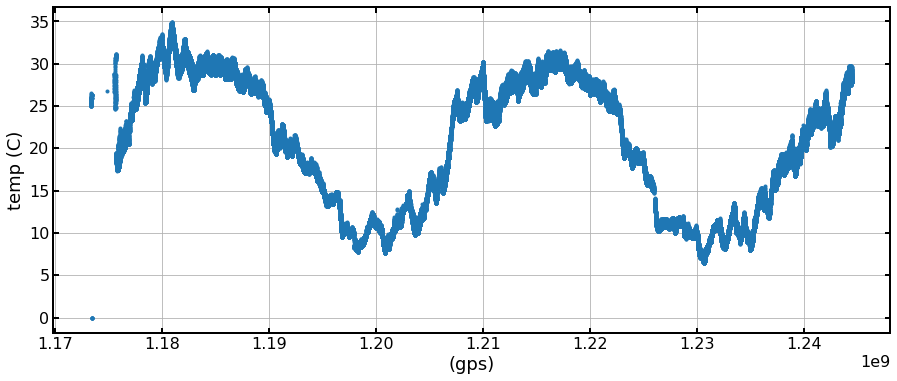

In [14]:
plt.plot(data['timestamp'], data['field2'], '.')
plt.xlabel('(gps)')
plt.ylabel('temp (C)')

Text(0.5, 0, 'field2 temp')

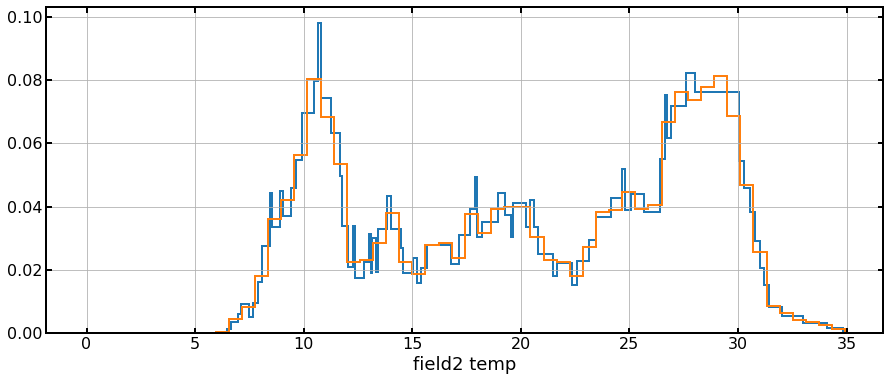

In [15]:
import astropy.stats.bayesian_blocks as bb

edges = bb(data['field2'])
plt.hist(data['field2'], bins=edges, histtype='step', lw=2, density=True)
plt.hist(data['field2'], bins='auto', histtype='step', lw=2, density=True)
plt.xlabel('field2 temp')

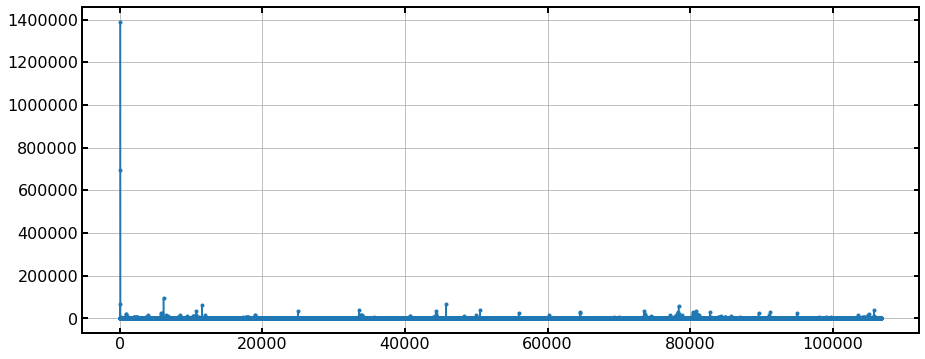

In [16]:
plt.plot(np.diff(data['timestamp']), '.-')

In [17]:
import scipy.fftpack as fftpack

Text(0, 0.5, 'FT')

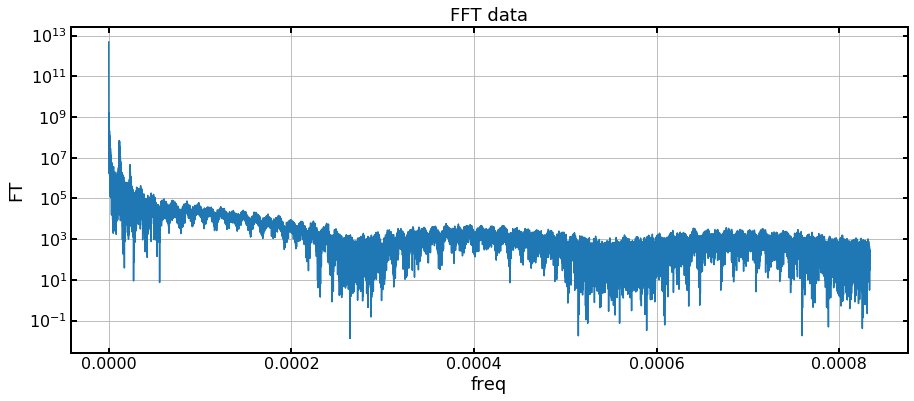

In [18]:
psd = np.abs(fftpack.fft(data['field2']))**2
freq = fftpack.fftfreq(len(psd), d=600)
nyq_ind = int(len(psd)/2.)  # the index of the last positive Fourier frequency

plt.plot(freq[0:nyq_ind], psd[0:nyq_ind])
plt.gca().set_yscale('log')
plt.title('FFT data')
plt.xlabel('freq')
plt.ylabel('FT')

/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'FT')

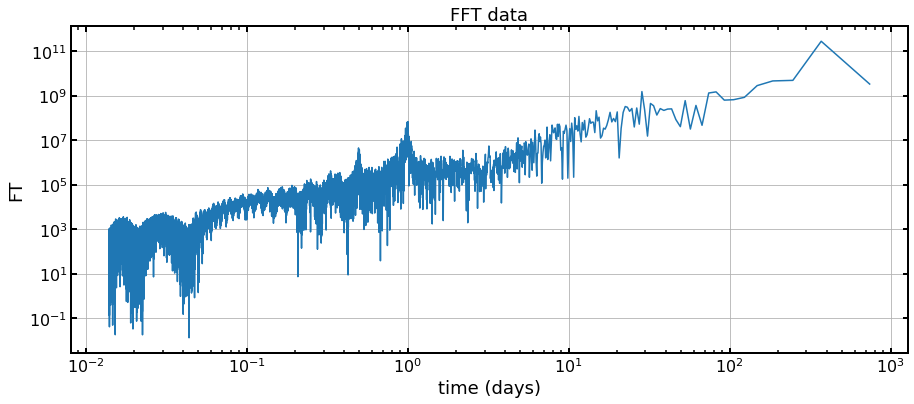

In [19]:
plt.plot((1/freq[0:nyq_ind])/60/60/24, psd[0:nyq_ind])
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.title('FFT data')
plt.xlabel('time (days)')
plt.ylabel('FT')

In [20]:
from astropy.stats import LombScargle
frequency, power = LombScargle(data['timestamp'], data['field2'], None).autopower()

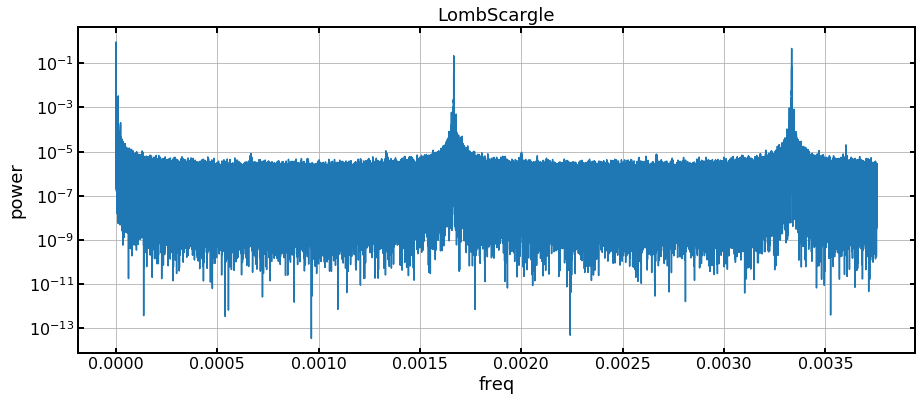

In [21]:
plt.plot(frequency, power)
plt.gca().set_yscale('log')
plt.xlabel('freq')
plt.ylabel('power')
plt.title('LombScargle')
plt.show()

Text(0, 0.5, 'log(power) ')

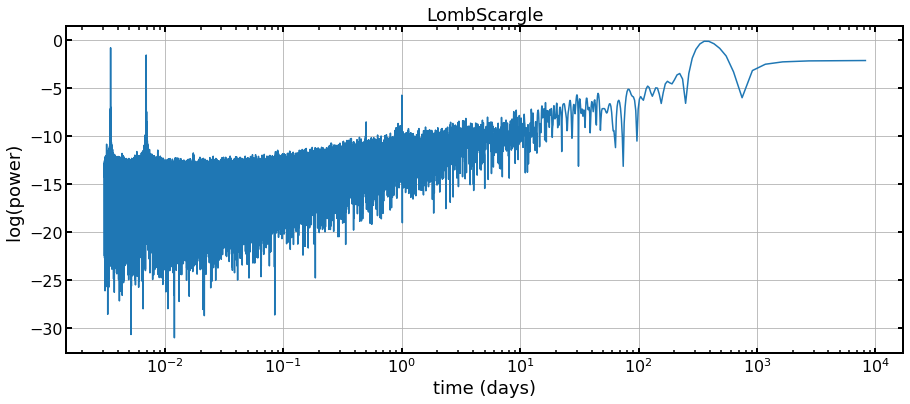

In [22]:
ts = (1/frequency)/60/60/24
plt.plot(ts, np.log(power))

plt.gca().set_xscale('log')
plt.title('LombScargle')
plt.xlabel('time (days)')
plt.ylabel('log(power) ')

we see the peaks at 1day and ~365 days!

In [23]:
from scipy.signal import find_peaks

In [24]:
?find_peaks

Text(0, 0.5, 'power')

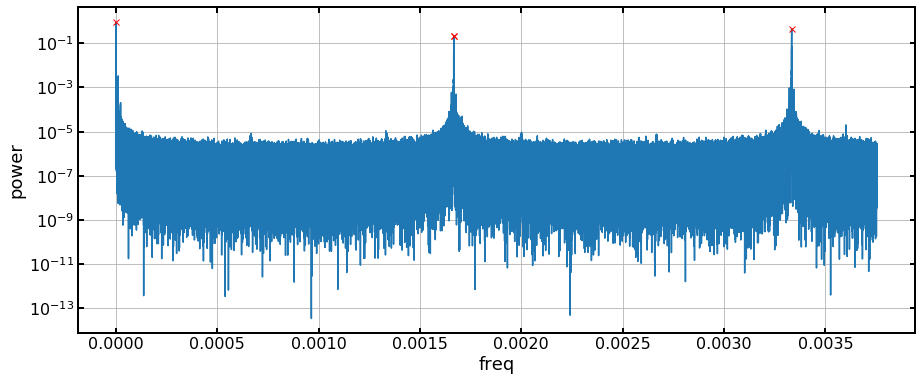

In [25]:

peaks_ind = find_peaks(power, height=0.2)[0]
plt.plot(frequency, power)
plt.plot(frequency[ peaks_ind ], power[ peaks_ind ], 'rx' )
plt.gca().set_yscale('log')
plt.xlabel('freq')
plt.ylabel('power')

In [26]:
(1/frequency[ peaks_ind ])/(60)

array([5.15129703e+05, 1.00001799e+01, 9.99963975e+00, 5.00000345e+00])